[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cenkbircanoglu/pytorch-workshop/blob/master/FastAI%20Fashion%20MNIST.ipynb)

In [1]:
!pip install fastai

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from fastai.vision import *
import numpy as np
import torch
import os

import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
dataset_root = "./data/fashion_pt" 
Dataset = FashionMNIST

In [3]:
transform = transforms.ToTensor()
trainset = Dataset(dataset_root, download=True, train=True, transform=transform)
testset = Dataset(dataset_root, download=True, train=False, transform=transform)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)

In [4]:
def save_img(tensor, train_or_valid, target, index):
    folder = './data/fashion_pt/' + train_or_valid + '/' + target + '/'
    if not os.path.exists(folder):
        os.makedirs(folder)
    torchvision.utils.save_image(tensor, folder + index +'.jpg', nrow=1, padding=0, normalize=False, range=None, scale_each=False, pad_value=0)


In [5]:
# Generating images for train

for index in np.arange(trainset.data.size()[0]):
    save_img(trainset.data[index] / 255., 'train', str(trainset.targets[index].numpy()), str(index))

In [6]:
# Generating images for validation

for index in np.arange(testset.data.size()[0]):
    save_img(testset.data[index] / 255. , 'valid', str(testset.targets[index].numpy()), str(index))

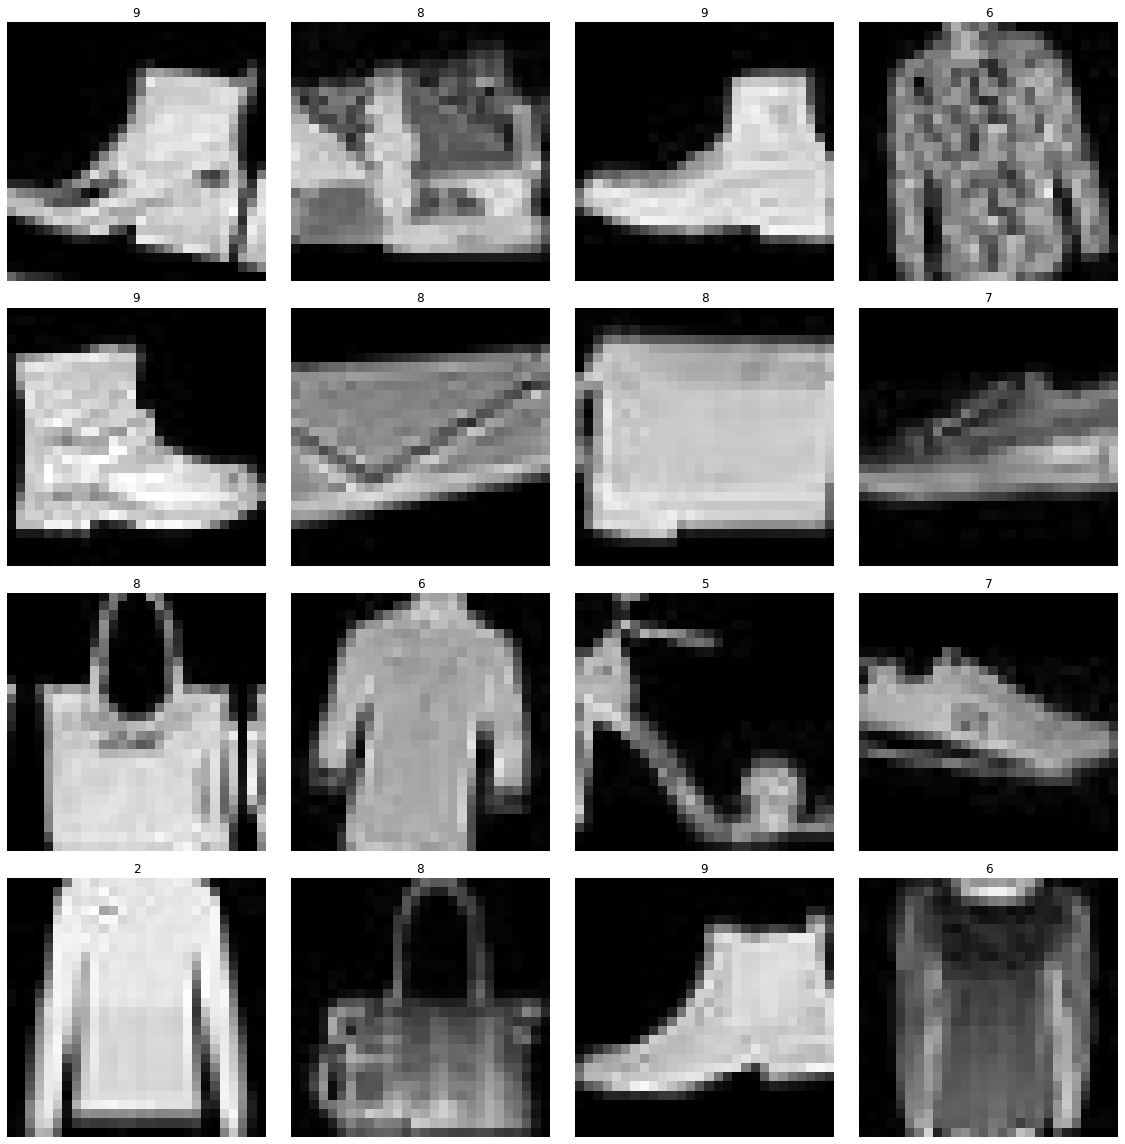

In [7]:
data = ImageDataBunch.from_folder(dataset_root, ds_tfms=get_transforms()).normalize(imagenet_stats)
data.show_batch(rows=4)

In [8]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)


In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


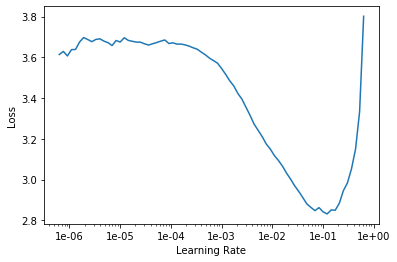

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(1,max_lr=5e-2) #67% 8min

epoch,train_loss,valid_loss,accuracy,time
0,0.540057,0.434201,0.839900,01:04


In [12]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


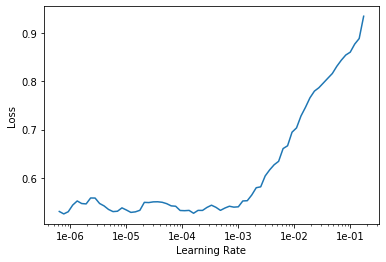

In [13]:
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.441607,0.382699,0.858900,01:16
1,0.421805,0.354052,0.869700,01:16
2,0.388150,0.328536,0.877300,01:17
3,0.375016,0.314448,0.884800,01:17
4,0.343584,0.312131,0.884100,01:16
5,0.338367,0.314649,0.884600,01:17


In [15]:
learn.fit_one_cycle(6, slice(1e-6,1e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.336404,0.309574,0.885000,01:16
1,0.351793,0.307278,0.886300,01:16
2,0.351571,0.304718,0.887200,01:17
3,0.344532,0.307122,0.888500,01:17
4,0.348590,0.302359,0.887400,01:17
5,0.342249,0.302736,0.888100,01:18
